# ANLP 2017 - Assignment 1


*Kuan Yu, 792917*

<div class="alert alert-block alert-danger">Due: Tuesday, November 7</div>

<div class="alert alert-block alert-info">
**NOTE**<br><br>

Please first fill in your name and id number at the top of the assignment, and **rename** the assignment file to **yourlastname-anlp-1.ipynb**<br><br>
Problems and questions are given in blue boxes like this one. All grey and white boxes must be filled by you (they either require code or a (brief!) discussion). <br><br>
Please hand in your assignment by the deadline via Moodle upload (we will provide a link). In case of questions, you can contact Tatjana or Jens via email, or via the Moodle forum (preferred).
</div>

<div class="alert alert-block alert-info">
Use Python 3 and the Natural Language Toolkit (NLTK) for the problems. The __[NLTK book](http://www.nltk.org/book/)__ ("Natural Language Processing with Python")
is available online.
<br>
<br>
You should also familiarize yourselves with working with unicode and
UTF-8 in Python. The session on Friday, October 27 can be used to get
up to speed with Python, NLTK, and the packages used in the assignments below.
</div>

## Problem 1: Zipf's Law

<div class="alert alert-block alert-info">
Empirically verify Zipf's law. Use the following freely available corpora, which are provided via the course's Moodle page:<br>

-  King James Bible, http://www.gutenberg.org/cache/epub/10/pg10.txt
-  The Jungle Book, http://www.gutenberg.org/cache/epub/35997/pg35997.txt
-  SETIMES Turkish-Bulgarian parallel newspaper text, http://opus.lingfil.uu.se/download.php?f=SETIMES2/bg-tr.txt.zip


For each corpus, produce a list of unique word forms sorted by descending frequency. Preferably using the Python libraries `numpy` and `matplotlib`, plot the  frequency  curves  for  the  corpora.  Make  sure  to  provide  both  a  linear curve, and a log-log curve (see methods `matplotlib.pyplot.plot` and `matplotlib.pyplot.loglog`). 
<div>

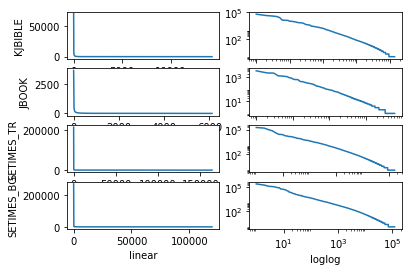

In [1]:
KJBIBLE = "kjbible.txt"  # do not change file names
JBOOK = "junglebook.txt"
SETIMES_TR = "SETIMES2.bg-tr.tr"
SETIMES_BG = "SETIMES2.bg-tr.bg"

from collections import Counter
import matplotlib.pyplot as plt
import nltk

# because `nltk.word_tokenize` has no bulgarian model, i'm just using
# a generic tokenizer here.
def tokenize(file, tokenizer= nltk.tokenize.WordPunctTokenizer()):
    "-> list str"
    with open(file, encoding='utf-8') as file:
        return tokenizer.tokenize(file.read())


names = 'KJBIBLE', 'JBOOK', 'SETIMES_TR', 'SETIMES_BG'
files = tuple(map(eval, names))
texts = tuple(tokenize(file) for file in files)


for idx, name in enumerate(names):
    freq = [f for _, f in Counter(texts[idx]).most_common()]
    plt.subplot(4, 2, idx * 2 + 1)
    plt.plot(freq)
    plt.xlabel("linear")
    plt.ylabel(name)
    plt.subplot(4, 2, idx * 2 + 2)
    plt.loglog(freq)
    plt.xlabel("loglog")
    del freq
plt.show()

<div class="alert alert-block alert-info">
Provide a brief discussion of the findings.
</div>

These four corpora, despite coming from different domains and different languages, all have word frequencies in power distributions.

## Problem 2: Random Text Generation

<div class="alert alert-block alert-info">
In  this  assignment,  you  will  reimplement  the  "Dissociated  Press"  system
that  was  developed  by  MIT  students  in  the  1970s  (see  Wikipedia).  The
purpose of this system is to generate random text from an
n-gram model over a corpus.
<br><br>
Unfortunately the NLTK ngram models haven't been working for the last few years with Python3. Instead, Jens has implemented a pared-down version of the `NgramModel` class which allows you to generate a word based on some previous context, with the method `generate_one()`. Using this class, train an ngram model based on one of the texts from Problem 1.
<br><br>
Use your system to produce a number of text samples, 100 words in length
per each. Vary the length of the context, $n$, from 2 to 4. 
</div>

In [2]:
# i'm using the king james bible here, generating 12 examples of
# length 100 for each ngram model with n in [2, 4].

from collections import deque
from itertools import repeat, islice
from ngram import NgramModel

text = texts[0]
model = NgramModel(4, text, nltk.probability.LaplaceProbDist)

def generate(model):
    "-> stream str"
    n = model._n - 1
    context = deque(repeat("", n), n)
    while True:
        t = model.generate_one(context)
        yield t
        context.append(t)


num_eg = 12
len_eg = 100
print("\n\n* n = 4\n")
for _ in range(num_eg): print(*islice(generate(model), len_eg))
print("\n\n* n = 3\n")
for _ in range(num_eg): print(*islice(generate(model.backoff), len_eg))
print("\n\n* n = 2\n")
for _ in range(num_eg): print(*islice(generate(model.backoff.backoff), len_eg))



* n = 4

he made as though he heard them . 35 : 19 Let us therefore follow after the things which must be hereafter . 4 : 18 And Jesus , when he reigned , that he rent his clothes , and threw down the high places , and fountains in the midst hard by their buttocks , and sent it by the works of him which believeth in Jesus . 3 : 13 Happy is the man that executeth my counsel from a far country unto me , Return unto thy country , and dwelled between Kadesh and Bered . 16
. 27 : 7 Fine linen with broidered work , and fine flour , and the voice of the people unto the LORD . 2 : 14 Blotting out the handwriting of ordinances that was against me : thou , most upright , dost weigh the path of judgment , and pervert all equity . 3 : 5 Circumcised the eighth day he sent the people away into their tents . 22 : 16 Thus saith the LORD , Behold , the hour cometh , and hath not been wrought with , and which is heaved up , of the
9 Lest thou give thine honour unto others , yet doubtless I am to be ga

and their hands on us go forth grass of coals of Isaac ; he shall offer his clothes , they were about a rolling thing be as thou shalt persude him , thou , and are appointed heir ; but they have replenished . 13 He calleth herself , and all the bars of life , His scales are in their sins were upon their delectable things sacrificed for thou didst ride prosperously effected . 20 : 6 The carcases of Nod , and their heart . 11 But the tribe of Israel . 29 Whereunto he besought that said
Egypt that Herod , and returned . 34 And it be overpast . 2 : and have had seen also in those things , and they had neither found in the Jews round about six . 2 : and to Zebul , and Sadducees ,) 16 : see , that is there enlargement and sinners be uncovered his God , and they assemble you to eat of the excellent things . 13 : 31 : 25 And Humtah , we have some of sinful kingdom shall say unto you good , in Padanaram , This is the Hivites that join
inventors of peace at that he lifted up Theudas , If thou th

<div class="alert alert-block alert-info">
Submit a few interesting texts that your system
generates,  and  discuss briefly how  the  quality  (and  creativity)  of  the  generated
outputs changes with $n$. 
</div>

n = 4

```
This eBook is for the life of Amram were an hundred round about .

Thy brother came with subtilty , and kill it at the brook of Eshcol , and Mamre ; let them go .

1:3 Concerning his Son Jesus , sent him to reproach the living God , that thou observe these things , I will send those that escape of them unto the priest .

6:2 That Sanballat and Geshem sent unto me , saying , See that ye refuse not him that eateth : for God is judge himself .

24:16 Then let them which be disobedient , the stone which was set over the reapers answered and said , Behold another man running alone .

7:22 By so much was Jesus made a surety of a better hope did ; by the greatness of thine iniquity is taken away , unless they cause some to fall .
```

n = 3

```
The evil bow before him ; which are needful to the right shoulder for his portion : it shall tingle .

50:12 Your mother shall be left ; for the fear of God

and she became a proverb and a reward ; for I will kindle a fire

And she spake unto Moses , If thou hast visited me : and the he goats , and teaching every man 's wife ; because we keep his commandments to walk

so they went up from the noise of many waters ; their blood shall be the sign which shall burn them together for good that I may not be saved .

14:14 And Jesus answering them began to reign , and every oblation of a place by itself
```

n = 2

```
young bullocks , I have profaned mine equal

of the children of garments , for me for ever taught all , then they that feareth God

ye have I have despised thy walls come , and the world

Whosoever curseth their cities , but few in my gold , as water for thee , and removed from Millo , Go to find so far off .

the LORD : and there shall wander for us , then hath no more with him to an house round about , which I will magnify mine eyes with thy chosen to my counsel of Ahaz slept .

harvest is appointed , and to watch , and feared the son , and many kings of God of the Spirit : the LORD thy steps of the gospel , and another disciple , and said unto the host , Lord GOD .
```

With higher `n`, the texts generated are better well-formed, in aspects such as capitalization, punctuation, and inflection.  With lower `n`, the texts generated are more surprising (which may be considered a symptom of creativity), when they are interpretable at all.

## Problem 3: Pointwise Mutual Information

<div class="alert alert-block alert-info">
In statistical NLP we frequently make independence assumptions about relevant events which are not actually correct in reality. We are asking you to test the independence assumptions of unigram language models.<br><br>

$
\mathrm{pmi} = \frac{P(X_t=w_1,X_{t+1}=w_2)}{P(X_t=w_1)P(X_{t+1}=w_2)} \approx \frac{f(w_1,w_2)N}{f(w_1)f(w_2)}
$
<br><br>

*Pointwise mutual information*
is a measure of statistical dependence of the events $ X_t = w_1$ and $X_{t+1} = w_2 $; $f(w)$ is the absolute frequency of word $w$ and $N$ is the total size of the corpus.
<br><br>

If the probability  of  the  next  word  in  the  corpus  being $w_2$
is  unaffected  by  the probability of the previous word being $w_1$, then pmi$(w_1,w_2) = 1$; otherwise
the pmi is higher or lower than one.
<br><br>
Calculate the pmi for all successive pairs $(w_1,w_2)$ of words in the King James
Bible corpus. Words (not word pairs!) that occur in the corpus less than 10
times should be ignored. List the 20 word pairs with the highest pmi value
and the 20 word pairs with the lowest pmi value.
</div>

In [4]:
text = texts[0]
word2freq = Counter(text)
pair2freq = Counter(zip(text, text[1:]))

pair2pmi = {}
for pair, freq in pair2freq.items():
    freq1, freq2 = word2freq[pair[0]], word2freq[pair[1]]
    if (10 <= freq1) and (10 <= freq2):
        pair2pmi[pair] = (freq * len(text)) / (freq1 * freq2)

pair_pmi = sorted(pair2pmi.items(), key= lambda pp: pp[1])

print("\n\n* 20 highest pmi\n")
for (w1, w2), pmi in pair_pmi[:-21:-1]: print(w1, w2, pmi, sep="\t")
print("\n\n* 20 lowest pmi\n")
for (w1, w2), pmi in pair_pmi[:20]: print(w1, w2, pmi, sep="\t")



* 20 highest pmi

United States 101437.0
Literary Archive 78028.46153846153
Archive Foundation 42265.416666666664
ill favoured 28982.0
Judas Iscariot 25149.669421487604
curious girdle 21355.157894736843
brook Kidron 21280.48951048951
poureth contempt 20287.4
First Epistle 20126.38888888889
measuring reed 19560.853994490357
Second Book 19507.115384615383
Epistle General 19321.333333333332
Second Epistle 19321.333333333332
divers colours 19321.333333333332
persecution ariseth 18443.090909090908
Mary Magdalene 17219.243827160495
First Book 16255.929487179486
overflowing scourge 15369.242424242424
sharp sickle 14701.014492753624
General Epistle 14491.0


* 20 lowest pmi

of	and	0.0007536225957714074
of	to	0.0021765788418023095
.	and	0.0029649994323054643
of	he	0.003033432283248274
of	:	0.003349615473244434
for	and	0.0035958474744849545
:	And	0.0036075509882789497
with	:	0.0038573830527244375
the	said	0.0040778910681634785
of	is	0.004276352189332796
as	,	0.004389571504610418
with	,	0.0047

<div class="alert alert-block alert-info">
Briefly discuss the validity of the independence assumption for unigram models.
</div>

Some word pairs have pmi much higher/lower than 1, they occur together more often/seldom than they indenpendently would.  The independence assumption for unigram models is invalid.